In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob


%matplotlib inline

In [2]:
h = tf.constant("Hello")
w = tf.constant("World")
hw = h + w
print("hw: ", hw)
with tf.Session() as session:
    ans = session.run(hw)
    print(ans, type(ans), ans.decode("utf-8"))

hw:  Tensor("add:0", shape=(), dtype=string)
b'HelloWorld' <class 'bytes'> HelloWorld


In [5]:
tf.reset_default_graph()

a = tf.constant(5, name = "a")
b = tf.constant(4)
c = tf.constant(3)

d = tf.multiply(a, b)
e = tf.add(c, d)
f = tf.subtract(d, e)
with tf.Session() as session:
    print("f: ", session.run(f))
    print("tf.Graph() = ", tf.Graph())
    print("tf.get_default_graph() = ", tf.get_default_graph())
    print("f.graph = ", f.graph)

f:  -3
tf.Graph() =  <tensorflow.python.framework.ops.Graph object at 0x62ba3f0d0>
tf.get_default_graph() =  <tensorflow.python.framework.ops.Graph object at 0x62b98a350>
f.graph =  <tensorflow.python.framework.ops.Graph object at 0x62b98a350>


In [7]:

# The name of the Tensor object is simply the name of its corresponding operation 
# (concatenated with a colon), followed by the index of that tensor in the outputs of the 
# operation that produced it —it is possible to have more than one.
# Objects residing within the same graph cannot have the same name
# As a consequence, it will automatically add an underscore and a number to distinguish the two. 
# However, both objects can have the same name when they are associated with different graphs

a, b 

(<tf.Tensor 'a:0' shape=() dtype=int32>,
 <tf.Tensor 'Const:0' shape=() dtype=int32>)

In [8]:
g1 = tf.get_default_graph()
g2 = tf.Graph()
print(g1 is tf.get_default_graph())
with g2.as_default():
    print(g1 is tf.get_default_graph(), g2 is tf.get_default_graph())
print(g1 is tf.get_default_graph())

True
False True
True


In [13]:
tf.reset_default_graph()
g1 = tf.Graph()
g2 = tf.Graph()
with g1.as_default():
    c1 = tf.constant(4.0)

with g2.as_default():
    c2 = tf.constant(2.0)

try:
    c = c1 + c2
    with tf.Session() as session:
        session.run(c)
except ValueError as ex:
    print("Expression c1 + c2 is not valid since these two variables belong to different graphs")
    


Expression c1 + c2 is not valid since these two variables belong to different graphs


In [14]:
# Group variable with name scope
with tf.name_scope("3"):
    c1 = tf.constant(4.0)
c1
    

<tf.Tensor '3/Const:0' shape=() dtype=float32>

In [19]:
a = tf.constant(1.0)
b = 1.0 + a
c = 1.0 + b
d = 1.0 + c
e = 1.0 + d
f = 1.0 + e

fetchers = [a, b, c, d, e, f]

with tf.Session() as session:
    print(session.run(fetchers))

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0]


Default data types for tensorflow is int32 and float32 respectively.

In [20]:
c = tf.constant([[1, 2, 3], [4, 5, 6]])
c

<tf.Tensor 'Const_4:0' shape=(2, 3) dtype=int32>

In [23]:
a = np.array([[1, 2, 3], [4, 5, 6]])
c = tf.constant(a)
c

<tf.Tensor 'Const_7:0' shape=(2, 3) dtype=int64>

In [24]:
a.dtype

dtype('int64')

In [17]:
c = tf.constant(4, dtype='float64')
c.dtype

tf.float64

# Primitive Data Types
- DT_FLOAT	tf.float32	32 bits floating point.
- DT_DOUBLE	tf.float64	64 bits floating point.
- DT_INT8	tf.int8	8 bits signed integer.
- DT_INT16	tf.int16	16 bits signed integer.
- DT_INT32	tf.int32	32 bits signed integer.
- DT_INT64	tf.int64	64 bits signed integer.
- DT_UINT8	tf.uint8	8 bits unsigned integer.
- DT_UINT16	tf.uint16	16 bits unsigned integer.
- DT_STRING	tf.string	Variable length byte arrays. Each element of a Tensor is a byte array.
- DT_BOOL	tf.bool	Boolean.
- DT_COMPLEX64	tf.complex64	Complex number made of two 32 bits floating points: real and imaginary parts.
- DT_COMPLEX128	tf.complex128	Complex number made of two 64 bits floating points: real and imaginary parts.
- DT_QINT8	tf.qint8	8 bits signed integer used in quantized Ops.
- DT_QINT32	tf.qint32	32 bits signed integer used in quantized Ops.
- DT_QUINT8	tf.quint8	8 bits unsigned integer used in quantized Ops.



### TensorFlow operation	Description
- tf.constant(value)	Creates a tensor populated with values of as specified by arguments “value”
- tf.fill(shape,value)	Creates a tensor of shape “shape" and fills it with “value" 
- tf.zeros(shape)	Returns a tensor of shape “shape” and all elements set to zero
- tf.zeros_like(tensor)	Returns a tensor of the same type and shape as “tensor" with all elements set to zero
- tf.ones(shape)	Returns a tensor of shape “shape" and all elements set to 1
- tf.ones_like(tensor)	Returns a tensor of the same type and shape as “tensor" with all elements set to 1

In [41]:
session = tf.Session()

In [42]:
c = tf.ones((4, 3))
session.run(c)

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

In [43]:
c = tf.fill((4, 3), 1)
session.run(c)

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=int32)

TensorFlow operation	Description
- tf.random_normal(shape, mean, stddev)	Outputs random values from a normal distribution
- tf.truncated_normal(shape, mean, stddev)	Outputs random values from a truncated normal distribution (values whose  magnitude is more than 2 standard deviations from the mean are dropped and re-picked).
- tf.random_uniform(shape, minval, maxval)	Generated values from a uniform distribution in the range [minval, maxval)
- tf.random_shuffle(tensor)	Randomly shuffles a tensor along its first dimension
- tf.random_crop(tensor, shape)	Slices a shape “shape” portion out of “tensor" at a uniformly chosen offset
- tf.multinomial(logits, n_samples)	Draws samples from a multinomial distribution
- tf.random_gamma(shape,alpha,beta)	Draws “shape" samples from each of the given Gamma distribution(s)


In [44]:
c = tf.random_uniform((4, 3), seed=100)
session.run(c)

array([[0.9617498 , 0.44918132, 0.5127076 ],
       [0.8348917 , 0.54734325, 0.8099698 ],
       [0.71889913, 0.39656377, 0.9537337 ],
       [0.93378425, 0.04777336, 0.07103348]], dtype=float32)

In [45]:
c = tf.random_normal((4, 3), mean=0, stddev=0.3, seed=100)
session.run(c)

array([[ 0.026301  , -0.07955144, -0.29859897],
       [ 0.1763167 , -0.30626023,  0.12118966],
       [ 0.14748672, -0.19404596, -0.03731908],
       [ 0.08446319,  0.3193688 ,  0.66740936]], dtype=float32)

In [46]:
c = tf.linspace(0.2, 0.3, 5)
print(c.get_shape())
session.run(c), 

(5,)


(array([0.2       , 0.22500001, 0.25      , 0.275     , 0.3       ],
       dtype=float32),)

In [47]:
c = tf.range(0.4, 5.0, 0.25)
print(c.get_shape())
session.run(c)

(19,)


array([0.4 , 0.65, 0.9 , 1.15, 1.4 , 1.65, 1.9 , 2.15, 2.4 , 2.65, 2.9 ,
       3.15, 3.4 , 3.65, 3.9 , 4.15, 4.4 , 4.65, 4.9 ], dtype=float32)

In [48]:
X = tf.random_normal((5, 10), mean = 0.0, stddev = 1.0, seed = 0)
w = tf.random_normal((10, 1), mean = 0.0, stddev = 1.0, seed = 0)
b = tf.fill((5, 1), 1.0) # Create tensors of a given value
s = tf.sigmoid(tf.matmul(X, w) - b)
session.run(s)

array([[0.9999913 ],
       [0.14483425],
       [0.9941877 ],
       [0.55156505],
       [0.9913591 ]], dtype=float32)

TensorFlow operator	Shortcut	Description
- tf.add()	a + b	Add a and b, element-wise
- tf.mul()	a * b	Multiply a and b, element-wise
- tf.sub()	a - b	Subtract a from b, element-wise
- tf.div()	a / b	Will perform element-wise integer division when given an integer type tensor, and floatingpoint (“true”) division on floating point tensors
- tf.pow()	a ** b	The result of raising each element in a to its corresponding element b, element-wise
- tf.mod()	a % b	Element-wise modulo
- tf.logical_and()	a & b	Returns the truth table of a & b, element-wise. dtype must be tf.bool
- tf.greater()	a > b	Returns the truth table of a > b, element-wise
- tf.greater_equal()	a >= b	Returns the truth table of a >= b, element-wise
- tf.less_equal()	a <= b	Returns the truth table of a <= b , element-wise
- tf.less()	a < b	Returns the truth table of a < b, element-wise
- tf.neg()	-a	Returns the negative value of each element in a
- tf.logical_not()	~a	Returns the logical NOT of each element in a. Only compatible with Tensor objectswith dtype of - tf.bool
- tf.abs()	abs(a)	Returns the absolute value of each element in a
- tf.logical_or()	a | b	Returns the truth table of a | b, element-wise. dtype must be tf.bool

# Variable 

During the optimization process, tuning the weights of the model by iterative updates requires that their current state be maintained. For that purpose, TensorFlow uses special objects called “Variables”. Variables, unlike other Tensor objects that are “refilled” across calls to run(), can maintain a fixed state in the graph. Like other Tensors, Variables can be used as input for other operations in the graph.

Using Variables is done in two stages: (1) we call the tf.Variable() function in order to create a Variable, and define what value it will be initialized with and (2) we then have to explicitly perform an initialization operation by running the session with the tf.initialize_all_variables() method, which allocates the memory for the variable and sets the initial value as defined in (1).

Like with other Tensor objects, Variables are only computed when the model runs, as we can see in the following example:


In [50]:
c = tf.constant(15, name = "c")
x = tf.Variable(c * 5, name = "x")
init = tf.global_variables_initializer()
session.run(init)
session.run(x)

75

# Placeholder

TensorFlow has designated built-in structures for feeding input values. These structures are called placeholders. Placeholders can be thought of as empty variables that will be filled with data later on. We use them by first constructing our graph and only when it is executed feed them with the input data.

Placeholders have three arguments we are already familiarized with: dtype for the type of data that will be inserted to them and two optional arguments — shape and name. If a shape is not fed, then the placeholder can be fed with data of any size. This is also the same as placing ‘None’ for a shape. We can also place ‘None’ for specific dimensions we are not sure about their length —for example, it is very common to use only for the rows dimension of a matrix, corresponding to the number of samples, while having the length of the columns (features) fixed. We feed the input values when running the session, just after stating what outputs we want to evaluate.

Whenever we define a placeholder, we must feed it with some input values or else an exception will be thrown. The input data is given as a dictionary, where each key corresponds to a placeholder variable name, and the matching values are the data values given in the form of a list or a numpy array.


In [51]:
X_data = np.random.randn(5, 10)
w_data = np.random.randn(10, 1)

X = tf.placeholder("float32", shape=(5, 10))
w = tf.placeholder("float32", shape=(10, 1))
b = tf.fill((5, 1), - 1.0)
s = tf.sigmoid(tf.matmul(X, w) + b)

session.run(s, feed_dict={X: X_data, w: w_data})

array([[0.95023626],
       [0.05953365],
       [0.9869032 ],
       [0.57299566],
       [0.16911489]], dtype=float32)

In [52]:
r = tf.constant([3, 4, 5, 9, 11], dtype="float32")
mean = tf.reduce_mean(r)
session.run(mean)

6.4

# Checkpoint a tensorflow session

You can use checkpoint to save the model to the disk and reload it later during inferencing. In this way, during inferencing time, you do not need to retrain the model.

In [54]:
tf.reset_default_graph()

with tf.Session() as sess:
    W = tf.Variable(3.0, dtype=tf.float32, name = "W")
    W = W.assign(W+1)
    sess.run(tf.global_variables_initializer())
    print(sess.run(W))
    saver = tf.train.Saver()
    saver.save(sess, "/tmp/1/model.ckpt")

4.0


# Restoring a tensorflow session

In [57]:
tf.reset_default_graph()
W1 = tf.Variable(3.0, dtype=tf.float32, name = "W")

with tf.Session() as sess:
    saver = tf.train.Saver()
    saver.restore(sess, "/tmp/1/model.ckpt")
    print(sess.run(W1))

INFO:tensorflow:Restoring parameters from /tmp/1/model.ckpt
4.0


# Gradients

In [138]:
X_data = np.random.ranf((10 * 3, 2))
X_data = (X_data - X_data.mean(axis = 0)) / X_data.std(axis=0)
W_true = np.array([0.1, 5.9])
b_true = 1.4
y_data = X_data.dot(W_true) + b_true
X_data.shape, y_data.shape

((30, 2), (30,))

y_pred Tensor("add:0", shape=(?, 1), dtype=float32)
dW: Tensor("gradients/MatMul_grad/MatMul_1:0", shape=(2, 1), dtype=float32)
db Tensor("gradients/add_grad/Reshape_1:0", shape=(), dtype=float32)
[[0.10000442]
 [5.899987  ]] 1.3999972


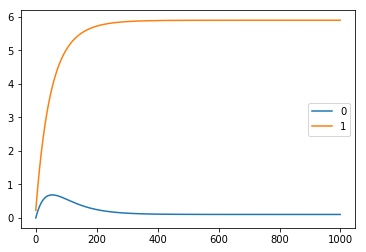

In [163]:
tf.reset_default_graph()
tf.set_random_seed(1)

X = tf.placeholder("float32", (None, 2))
y = tf.placeholder("float32", (None, 1))
learning_rate = tf.constant(0.01)

W = tf.Variable(tf.truncated_normal((2, 1), stddev=0.1))
b = tf.Variable(0.0)

y_pred = tf.matmul(X, W) + b
print("y_pred", y_pred)
mse = tf.reduce_mean((y - y_pred) ** 2)

dW, db = tf.gradients(mse, [W, b])
print("dW:", dW)
print("db", db)

grad_updates = tf.group([
    W.assign_sub(learning_rate * dW),
    b.assign_sub(learning_rate * db)
])

history = {"mse": [], "W": [], "b": []}
values = {X: X_data, y: y_data.reshape(-1, 1)}

with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())    
    for i in range(1000):
        mse_, W_, b_, _ = sess.run([mse, W, b, grad_updates], feed_dict= values)
        history["mse"].append(mse_)
        history["W"].append(W_)
        history["b"].append(b_)
    pd.DataFrame(np.array(history["W"])[:,:,0]).plot()
    print(W_, b_)
    

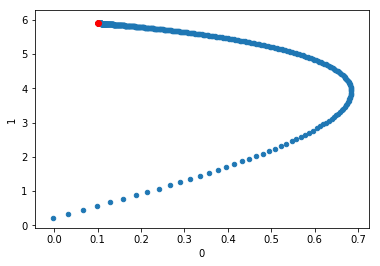

In [173]:
pd.DataFrame(np.array(history["W"])[:,:,0]).plot.scatter(0, 1)
plt.scatter(W_true[:1], W_true[1:], color = "red")

In [170]:
W_true[:1]

array([0.1])